In [1]:
from sklearn.tree import DecisionTreeClassifier as decision_tree_classifier
from sklearn import tree
import numpy
from IPython.display import Image as image
import pydotplus
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plot
%matplotlib inline

In [2]:
with open("german_data.txt") as file:
    data = numpy.array([line[:-1].split(' ') for line in file])

In [3]:
# Все данные типа "A..." будем кодировать натуральными числами как категорийные.

def make_int(field):
    try:
        return int(field)
    except:
        return int(field[-1])

In [4]:
numeric_data = numpy.array([
    [make_int(value) for value in array[:-1]]
    for array in data
])

answers = numpy.array(map(lambda x: int(x) - 1, data[:,-1]))

In [5]:
model = decision_tree_classifier(max_depth=3)
model.fit(numeric_data, answers)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
feature_names = [
    'Status of existing checking account',
    'Duration in month',
    'Credit history',
    'Purpose',
    'Credit amount',
    'Savings account/bonds',
    'Present employment since',
    'Installment rate in percentage of disposable income',
    'Personal status and sex',
    'Other debtors / guarantors',
    'Present residence since',
    'Property',
    'Age in years',
    'Other installment plans',
    'Housing',
    'Number of existing credits at this bank',
    'Job',
    'Number of people being liable to provide maintenance for',
    'Telephone',
    'foreign worker'
]

class_names = [
    'Good', 'Bad'
]

In [7]:
dot_data = tree.export_graphviz(
    model, out_file="small_tree.out", 
    feature_names=feature_names,  
    class_names=class_names,  
    filled=True, rounded=True,  
    special_characters=True
)

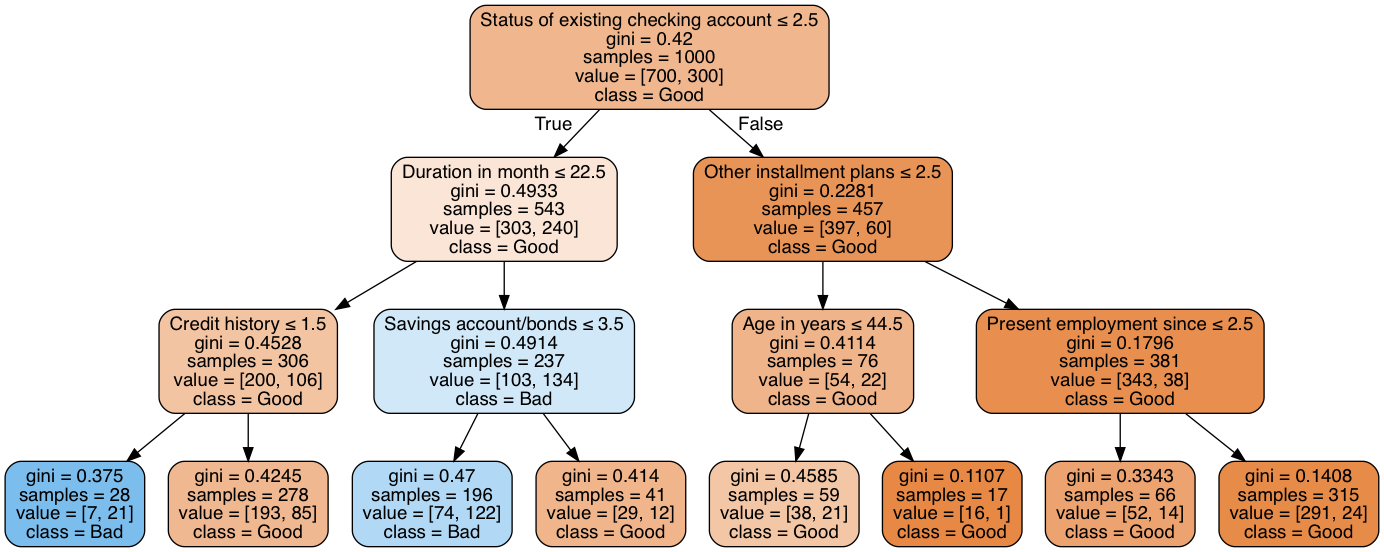

In [8]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
image(graph.create_png())

Ключевым фактором дерево посчитало наличие денег на счету. Видно, что вся левая часть дерева в принципе более синяя, чем правая. Интересно, что в целом в дереве преобладают красные вершины. Это произошло из-за того, что объектов, которым выдали кредит в обучающей выборке в больше чем в 2 раза больше чем тех, кому не выдали.

In [9]:
models = [decision_tree_classifier(max_depth=k) for k in range(2, 100)]
train_accuracy = []
for model in models:
    model.fit(numeric_data, answers)
    train_accuracy.append(accuracy_score(model.predict(numeric_data), answers))

test_accuracy = [cross_val_score(model, numeric_data, answers, cv=5).mean() for model in models]

(0, 1.1)

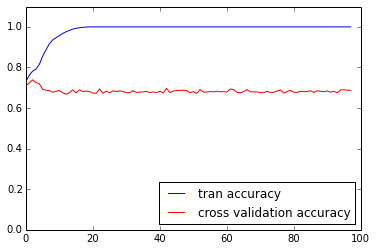

In [10]:
plot.plot(train_accuracy, label="tran accuracy", color="blue")
plot.plot(test_accuracy, label="cross validation accuracy", color="red")
axis = plot.gca()
axis.legend(loc="lower right")
axis.set_ylim(0, 1.1)

In [11]:
numpy.argmax(test_accuracy)

2

Видим, что на обучающей выборке качество довольльно быстро достигает идеалного. Зато на тестирующей, оптимальное значение качества выходит на глубине 3 и при больших значениях лучше не становится. Причем качество на тестирующей выборке начинает падать намного раньше, чем достигается единица на тестирующей выборке.